In [48]:
import numpy as np
import matplotlib.pyplot as plt

Wir haben in den Referaten bereits einiges über Optimierung gehört.

Nun ist es Zeit für praktische Übungen.
Letztendlich ist Machine Learning ein großes Optimierungsproblem wo man z.B. versucht die Parameters des Netzwerks an Trainingsdaten so anzupassen, dass diese einen möglichst optimalen Output erzeugen.


# 1. Gradient Descent

Gradient Descent wird auch der Weg des steilsten Abstieges genannt.
Ein (lokales) Minimum lässt sich damit finden, indem man ähnlich wie bei einer Wanderung einfach steil bergab geht.
Die Richtung des Abstieges lässt sich mit der/dem Ableitung/Gradient bestimmen.


Gradient Descent lässt sich formal schreiben für eine Funktion $f:\mathbb{R}\mapsto \mathbb{R}$:

$$ x_{n+1} = x_n - \gamma \cdot \frac{\mathrm{d}f}{\mathrm{d}x}\bigg\vert_{x_n}$$

In Falle von mehrerer Variablen (z.B. als Vektor gespeichert), gilt für $h:\mathbb{R}^N\mapsto \mathbb{R}^N$

$$ \vec x_{n+1} = \vec x_n - \gamma \cdot (\nabla h)(\vec x_n)$$

In beiden Fällen ist $\gamma$ die Schrittweite.

In [77]:
# TODO
def gradient_descent(df, x0, N, step_size=1e-2):
        
    for i in range(N):
        x0 = x0 - step_size * df(x0)
    
    """Returns the optimum value for x

    Arguments:
    df: A function which evaluates the derivative/gradient of f
    x0: Start value
    N: number of iterations
    step_size: Step size in each iteration
    """
    
    return x0

## Beispiel 1.1 Gradient Descent
Implementiere nun eine Funktion und deren Ableitung. Überprüfe, ob der gradient descent Mechanismus funktioniert.

Welche Funktion eignet sich?

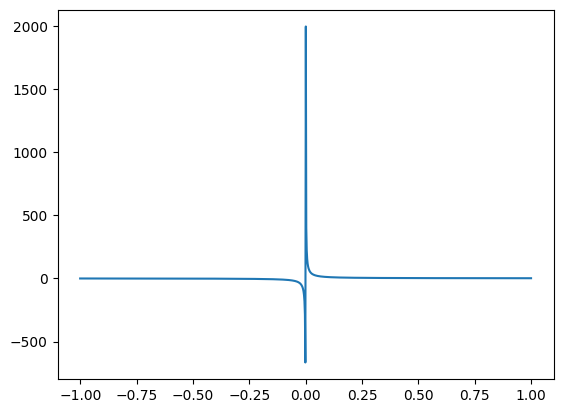

In [78]:
x = np.linspace(-1.001,1, 1000)

plt.plot(x, 1 / x)



In [79]:
# TODO
def f(x):
    return np.sin(x) * x
    
# TODO, Ableitung von f
def df(x):
    return np.cos(x) * x + np.sin(x)

In [80]:
gradient_descent(df, 1.0, 1000)

2.0520122078539266e-09

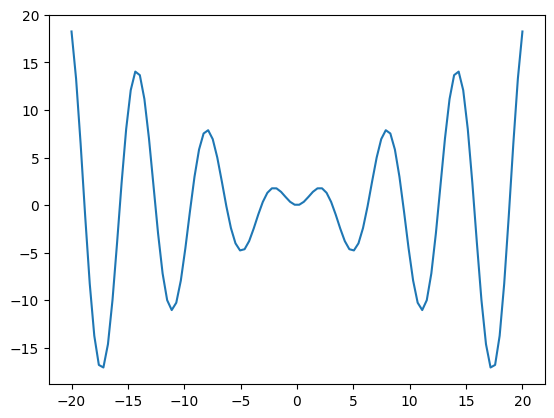

In [81]:
plt.plot(np.linspace(-20,20, 100), f(np.linspace(-20,20, 100)))

Was passiert, wenn die `step_size` zu groß ist? Spiele ein wenig damit rum, und auch der Anzahl der Iterationen

In [23]:
gradient_descent(df, 0, 1000, step_size=1)

0.0

In [75]:
def f_2(x):
    return (x-5)**2 + (x + 3) ** 3 + (x - 4)**4
    
# TODO
def df_2(x):
    # TODO
    return 2 * (x - 5) + 3 * (x + 3) ** 2 + 4 * (x - 4) ** 3

1.5860316537771528

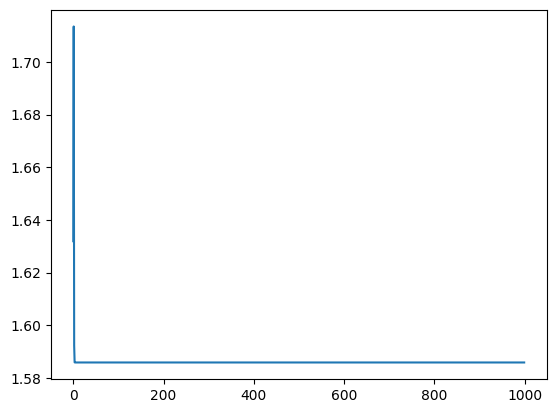

In [76]:
gradient_descent(df_2, 0, 1000)

## Beispiel 1.2 Gradient Descent

Implementiere eine Funktion mit mehreren Variablen (z.B. $(x - 21.3) ^2 + (y + 13.1)^4$).

Geht die Implementierung von oben nun auch für den mehrdimensionalen Fall?

In [82]:
# TODO, Funktion 
def f_3(v):
    x = v[0] # x
    y = v[1] # y
    ret = (x - 21.3) ** 2 + (y + 13.1) ** 4
    return ret
    
# TODO, Ableitung der Funktion
def df_3(v):
    x = v[0] # x
    y = v[1] # y
    
    dx = 2 * (x - 21.3) # partielle Ableitung nach x
    dy = 4 * (y + 13.1) ** 3
    
    grad = np.array([dx, dy])
    return grad

In [105]:
res = gradient_descent(df_3, np.array([0.0, 0.0]), 1000000, step_size = 1e-3)

In [106]:
df_3(res)

array([-1.76925141e-12,  5.59004154e-06])

In [108]:
res

array([ 21.3       , -13.08881975])

## Beispiel 1.3

Implementiere eine gradient descent Funktion, welche sowohl den Funktionswert, als auch $x_n$ in jeder Iteration speichert.
Nutze dafür ein array oder eine Liste.

In [109]:
def gradient_descent_track(f, df, x0, N, step_size=1e-2):
    log = [x0]
    log_f = [f(x0)]

    for i in range(N):
        x0 = x0 - step_size * df(x0)
        log.append(x0)
        log_f.append(f(x0))   
            
    return x0, log, log_f


In [123]:
x0, log, log_f = gradient_descent_track(f_3, df_3, np.array([0.0, 0.0]), 10000, 0.001)

In [124]:
x0

array([ 21.29999996, -12.98826285])

## Beispiel 1.4

Plotte den Funktionswert von `f_3` über die Anzahl der Iterationen.
Plotte in ein neues Fenster die Werte der Variablen über die Anzahl der Iterationen.

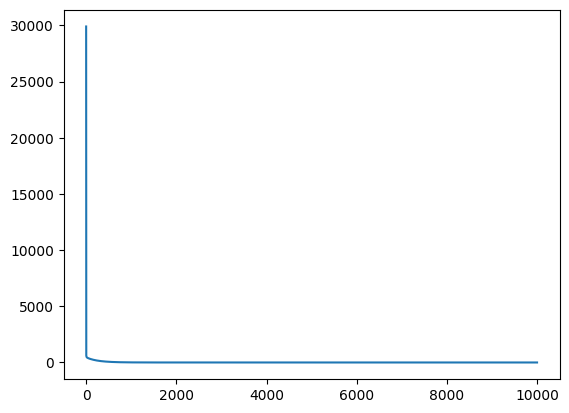

In [125]:
plt.plot(log_f)

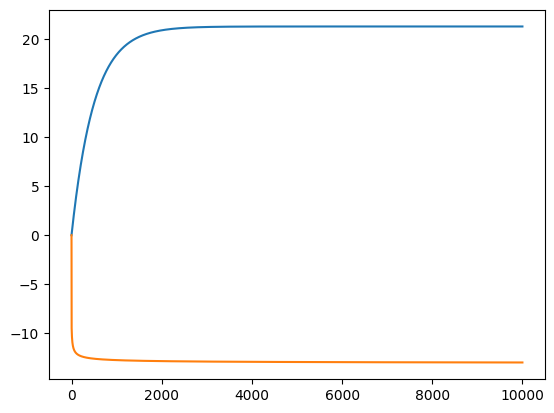

In [126]:
plt.plot(log)

In [127]:
log

[array([0., 0.]),
 array([ 0.0426  , -8.992364]),
 array([ 0.0851148, -9.2695912]),
 array([ 0.12754457, -9.49439072]),
 array([ 0.16988948, -9.68188843]),
 array([ 0.2121497 , -9.84163028]),
 array([ 0.2543254 , -9.98000637]),
 array([  0.29641675, -10.10149094]),
 array([  0.33842392, -10.20933   ]),
 array([  0.38034707, -10.30594744]),
 array([  0.42218638, -10.3931971 ]),
 array([  0.463942  , -10.47252571]),
 array([  0.50561412, -10.54508206]),
 array([  0.54720289, -10.61179205]),
 array([  0.58870849, -10.67341181]),
 array([  0.63013107, -10.73056602]),
 array([  0.67147081, -10.78377609]),
 array([  0.71272787, -10.83348127]),
 array([  0.75390241, -10.88005466]),
 array([  0.7949946 , -10.92381562]),
 array([  0.83600462, -10.96503933]),
 array([  0.87693261, -11.00396442]),
 array([  0.91777874, -11.04079902]),
 array([  0.95854318, -11.07572561]),
 array([  0.9992261 , -11.10890498]),
 array([  1.03982764, -11.14047944]),
 array([  1.08034799, -11.17057549]),
 array([  1.

# 2. Automatic Differentiation

Bisher war es recht mühsam, da wir die Ableitung per Hand ausgerechnet haben.
Zum Glück müssen wir das bei unseren Neuronalen Netzen nicht machen, da PyTorch Mechanismen hierfür eingebaut hat (Automatic Differentation).

Wir wollen nun komplexere Funktionen optimieren, ohne den Gradient per Hand zu berechnen.

In [128]:
import torch

In [135]:
x = np.array([1,2,3.0])

In [136]:
y = torch.tensor([1,2,3.0])

In [139]:
x

array([1., 2., 3.])

In [140]:
y.device

device(type='cpu')

In [216]:
y_gpu = torch.rand((8000, 8000), device="cuda");

In [217]:
%%timeit
torch.cuda.synchronize()

3.12 ms ± 4.95 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [218]:
y_cpu = torch.rand((8000, 8000), device="cpu");

In [219]:
%%timeit
torch.exp(y_cpu)

37.8 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [220]:
x_numpy = np.random.rand(8000, 8000)

In [221]:
%%timeit
np.exp(x_numpy)

101 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


PyTorch kann Ableitungen ganz von alleine berechnen

In [182]:
def parabel(x):
    return torch.log(x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2)\
            * torch.sin(x[0] ** x[1])

In [187]:
def f10(tensor):
    return torch.sum(tensor ** 2)  # x^2, x quadrat

In [204]:
x_tensor = torch.rand(100_000_000, requires_grad=True, device="cuda")

In [211]:
%%timeit
l = f10(x_tensor)
torch.cuda.synchronize()

7.95 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [210]:
%%timeit
l = f10(x_tensor)
l.backward()
torch.cuda.synchronize()

32 ms ± 83.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [202]:
torch.sum(torch.tensor([1,2,3,4,5]))

tensor(15)

In [198]:
torch.tensor([1,2,3,4,5]) ** 2

tensor([ 1,  4,  9, 16, 25])

In [183]:
parabel(torch.tensor([2,2,2,2]))

tensor(-2.0983)

In [ ]:
def parabel(x):
    return torch.log(x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2)\
            * torch.sin(x[0] ** x[1])

In [213]:
punkt = torch.tensor([2.0,2.0,2.0,2.0,123,123,123,123,2,2,21,1], requires_grad=True)
l = parabel(punkt)

In [214]:
# berechnet die Ableitung
l.backward()

In [215]:
punkt.grad

tensor([-7.4383, -5.2139, -0.1892, -0.1892,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000])

In [129]:
# Gegeben ist folgende Funktion g
def g_torch(x):
    return (x[0]-1)**2  + (torch.sqrt(x[1]) - torch.log(x[2]))**2 + x[1]**2 + (torch.log(x[1]) - 2)**2

In [241]:
# automatic differentiation
# reverse automatic differentiation -> das hier
# forward mode differentation
def gradient_descent_track_ad(f, x0, N, step_size=1e-2):
    # TODO
    # hier fehlen ein paar Variablen
    log = [x0.detach().clone().numpy()]
    log_f = [f(x0).detach().clone().numpy()]
    
    x = torch.tensor(x0, requires_grad=True)
    
    for i in range(N):
        
        l = f(x)
        
        # damit wird der gradient berechnet
        l.backward()
        
        df = x.grad
        # spezielles construct
        with torch.no_grad():
            # step update
            x = x - step_size * df
            
            # spezielles construct 
            x = torch.tensor(x, requires_grad=True)
            
            # speichere hier noch die variablen
            log_f.append(l.detach().numpy())
            log.append(x.clone().detach().numpy())
            
    return x, log, log_f

In [251]:
t_x, t_log, t_log_f = gradient_descent_track_ad(f_3, torch.tensor([1.0, 1.0], requires_grad=True), 
                                                100, 
                                                step_size=0.0001)

/tmp/ipykernel_25750/3920471759.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x0, requires_grad=True)
/tmp/ipykernel_25750/3920471759.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


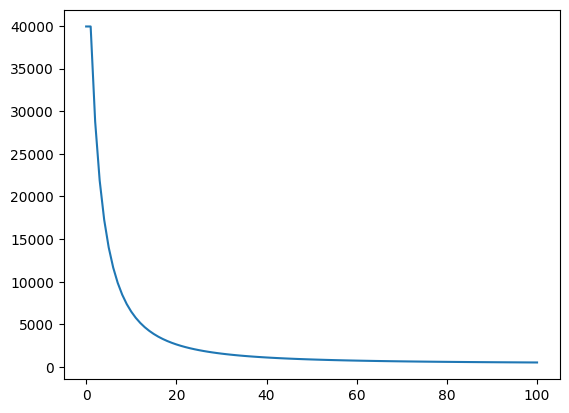

In [252]:
plt.plot(t_log_f)

# 3. Optimierer von PyTorch

PyTorch stellt eine ganze Reihe von verschiedenen Optimierern zur Verfügung.
`ADAM` wird relativ häufig benutzt.

Teste nun verschiedene Arten von Optimierern. Versuche auch eine graphische Darstellung zu machen, in denen du verschiedene Optimierer miteinander hinsichtlich Konvergenz und Startbedingungen vergleichst.

In [268]:
# orientiere dich an der vorherigen Funktion gradient_descent_track_ad
# Im Prinzip müssen nur wenige Teile geändert werden
def ADAM_optimize(f, x0, N, step_size=1e-2):
    log = [x0.numpy()]
    log_f = [f(x0).numpy()]
    
    x = torch.tensor(x0, requires_grad=True)
    
    optimizer = torch.optim.Adam([x], lr=1) # initialisiere hier den optimizer
    for i in range(N):
        optimizer.zero_grad()
        l = f(x)
        l.backward()
        optimizer.step()
        
        log.append(x.clone().detach().numpy())
        log_f.append(l.item())
      
            
    return x, log, log_f

In [269]:
# definiere die Funktion nun so, dass ein bestimmter optimierer über das keyword argument
# optimizer übergeben werden kann
def optimize(f, x0, N, optimizer=torch.optim.SGD, lr=1e-2):
    # ähnlich
            
    return x, log, log_f

In [270]:
t_x, t_log, t_log_f = ADAM_optimize(f_3, torch.tensor([0.0, 0.0]), 1000)

/tmp/ipykernel_25750/258803539.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x0, requires_grad=True)


In [271]:
t_x2, t_log2, t_log_f2 = optimize(f_2, torch.tensor([0.0, 0.0], requires_grad=True), 1000,\
                                        optimizer=torch.optim.Adadelta, lr=1)

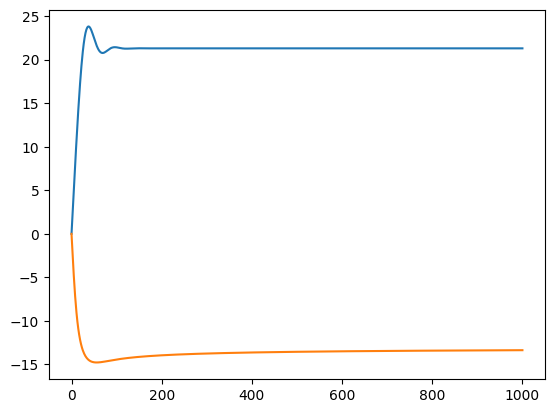

In [272]:
plt.plot(t_log)

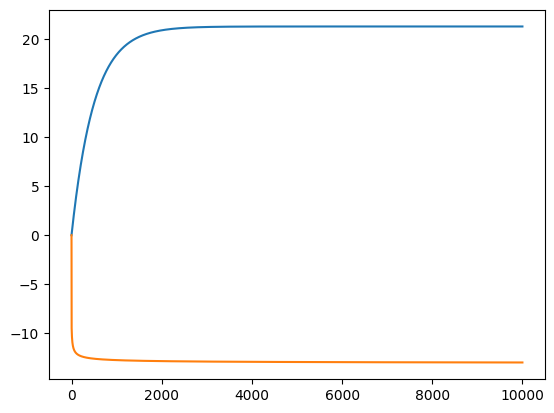

In [273]:
plt.plot(t_log2)

In [ ]:
torch.optim.

# 4. Rosenbrock Funktion

Mache auch die gleichen Vergleiche auch mit der Rosenbrock Funktion.

In [274]:
def rosenbrock(x):
    return (1.0 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

In [275]:
t_x_2, t_log_2, t_log_f_2 = torch_optimize(rosenbrock, torch.tensor([0.0, 0.0], requires_grad=True), 500,  lr=0.001)

NameError: name 'torch_optimize' is not defined

In [ ]:
plt.plot(t_log_2)

# 5. Weitere Funktionen

Auf Wikipedia findet man eine Reihe ganz verschiedener Funktionen.

Versuche ein paar davon zu optimieren!

https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [ ]:
t_x, t_log, t_log_f = torch_optimize(      , torch.tensor([0.2, 0.2], requires_grad=True), 5000, lr =0.01,\
                                     optimizer=torch.optim.Adadelta)

In [ ]:
plt.plot(t_log)